In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set_style("white")

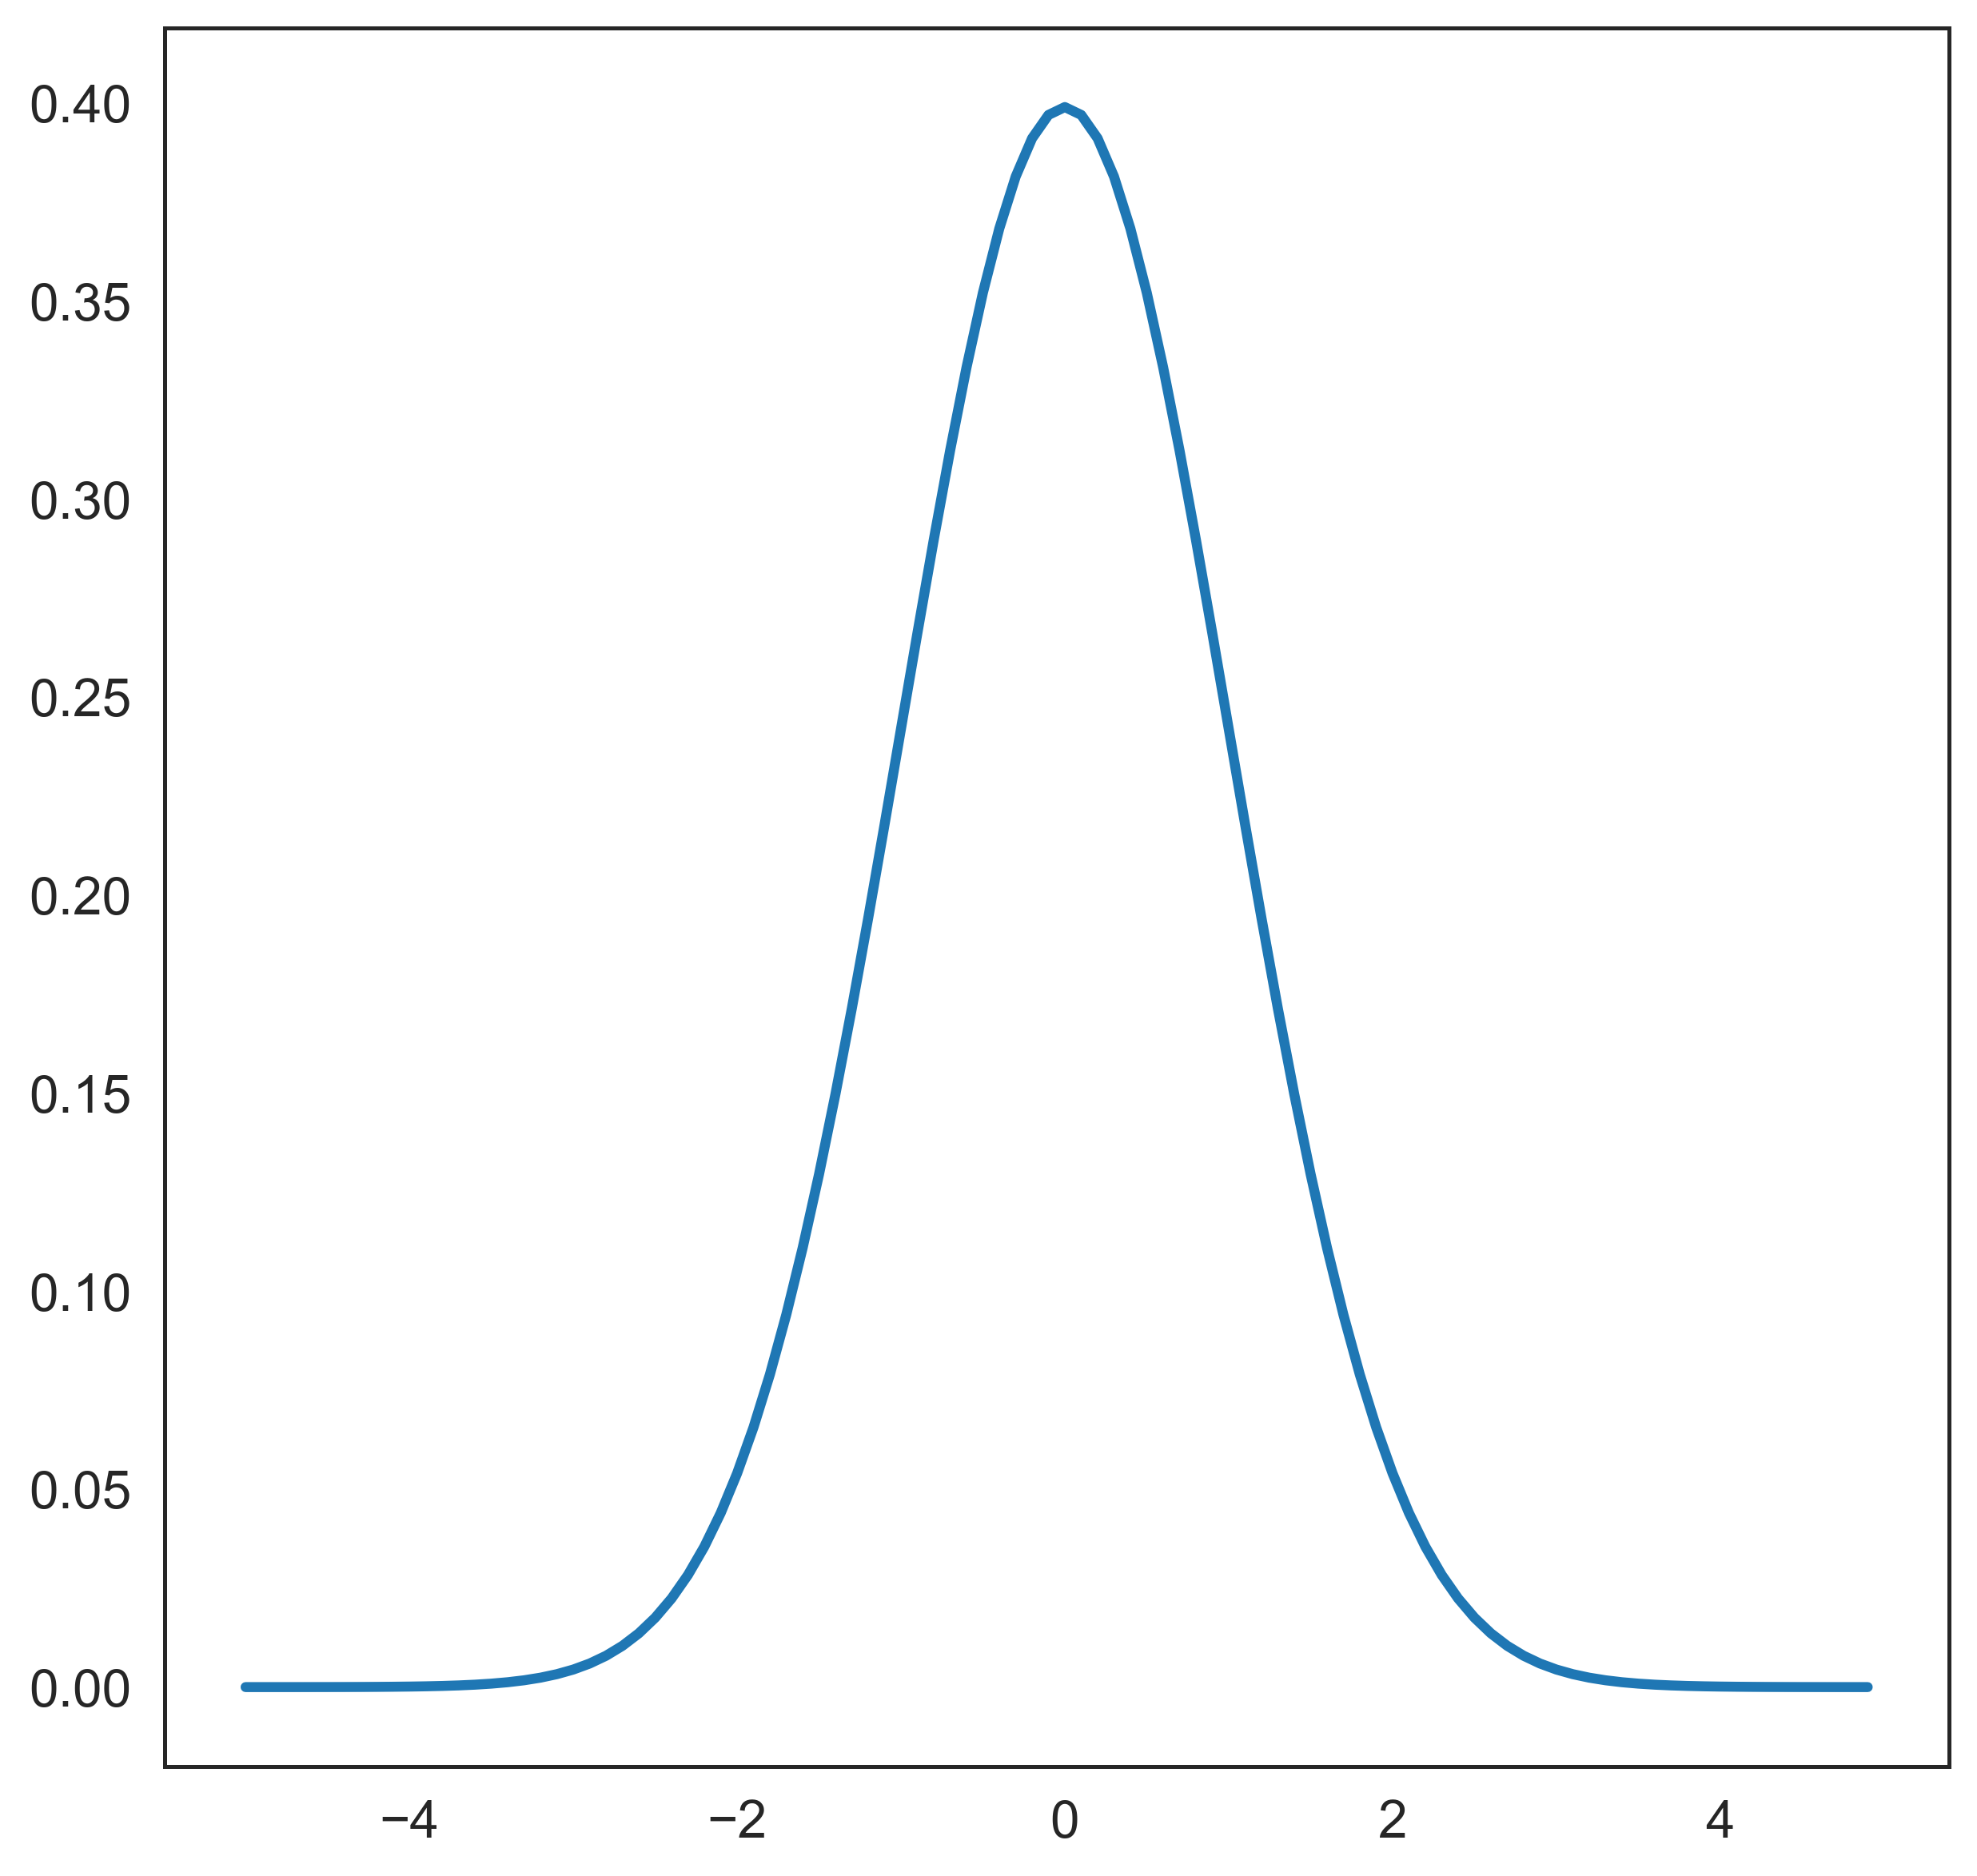

In [7]:
# plotting a normal distribution
fig, ax = plt.subplots(figsize=(8,8))
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.dpi'] = 360
mean = 0
standard_deviation = 1

x_values = np.arange(-5, 5, 0.1)
y_values = scipy.stats.norm(mean, standard_deviation)

plt.plot(x_values, y_values.pdf(x_values))

In [9]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [10]:
# convert columns into category
to_convert = ['sex', 'smoker', 'region'];  
df[to_convert] = df[to_convert].astype('category')

In [11]:
# convert strings to values
df['sex'] = df['sex'].cat.codes
df['smoker'] = df['smoker'].cat.codes
df['region'] = df['region'].cat.codes

In [5]:
# sex (0 - female, 1 -male)
# smoker (1 - yes, 0 - no)
# region (0 - northeast, 1 - northwest, 2 - southeast, 3 - southwest)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.9 KB


In [12]:
# calculate variance
df.age.var()

197.40138665754424

In [13]:
# calculate variance
df.bmi.var()

37.187883609773266

In [15]:
df2 = df[['age', 'bmi']]
df2.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


In [16]:
df2.cov()

,age,bmi
age,197.401387,9.362337
bmi,9.362337,37.187884


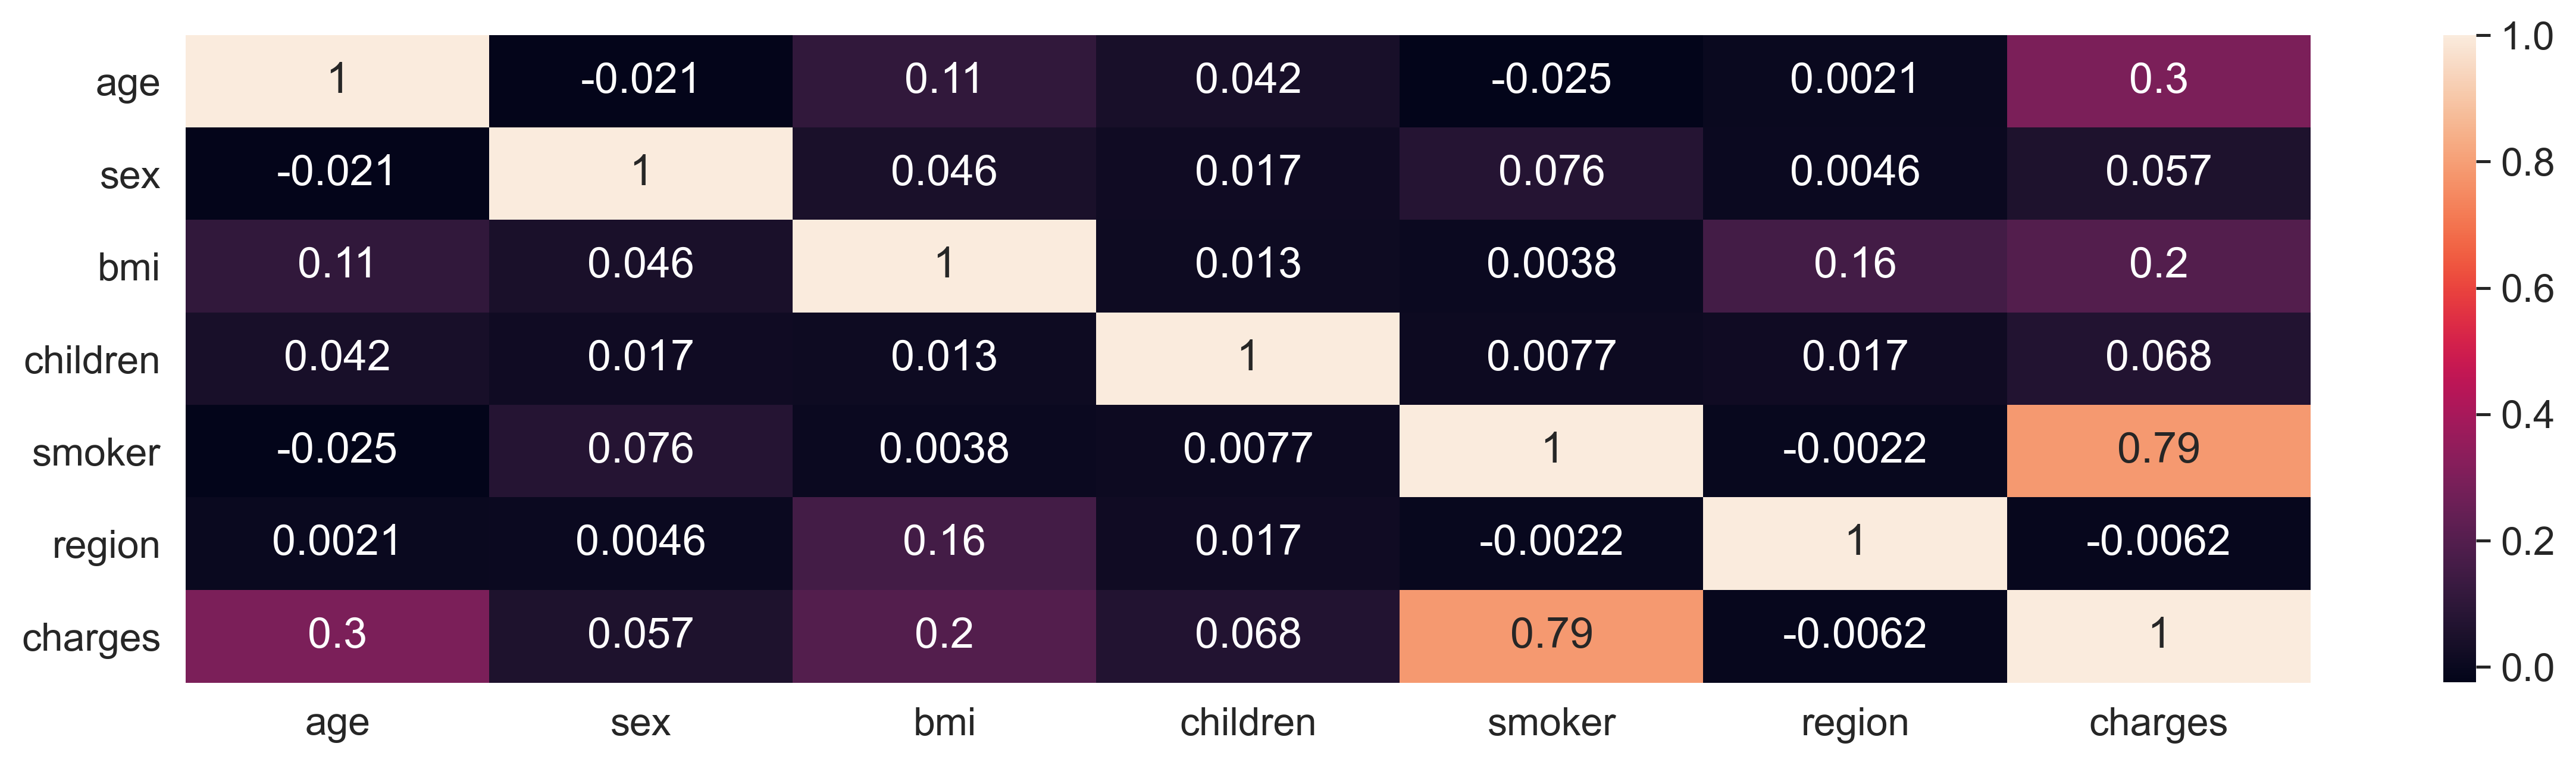

In [13]:
fig, ax = plt.subplots(figsize=(16,4))
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.dpi'] = 360
ax =sns.heatmap(df.corr(), annot = True)

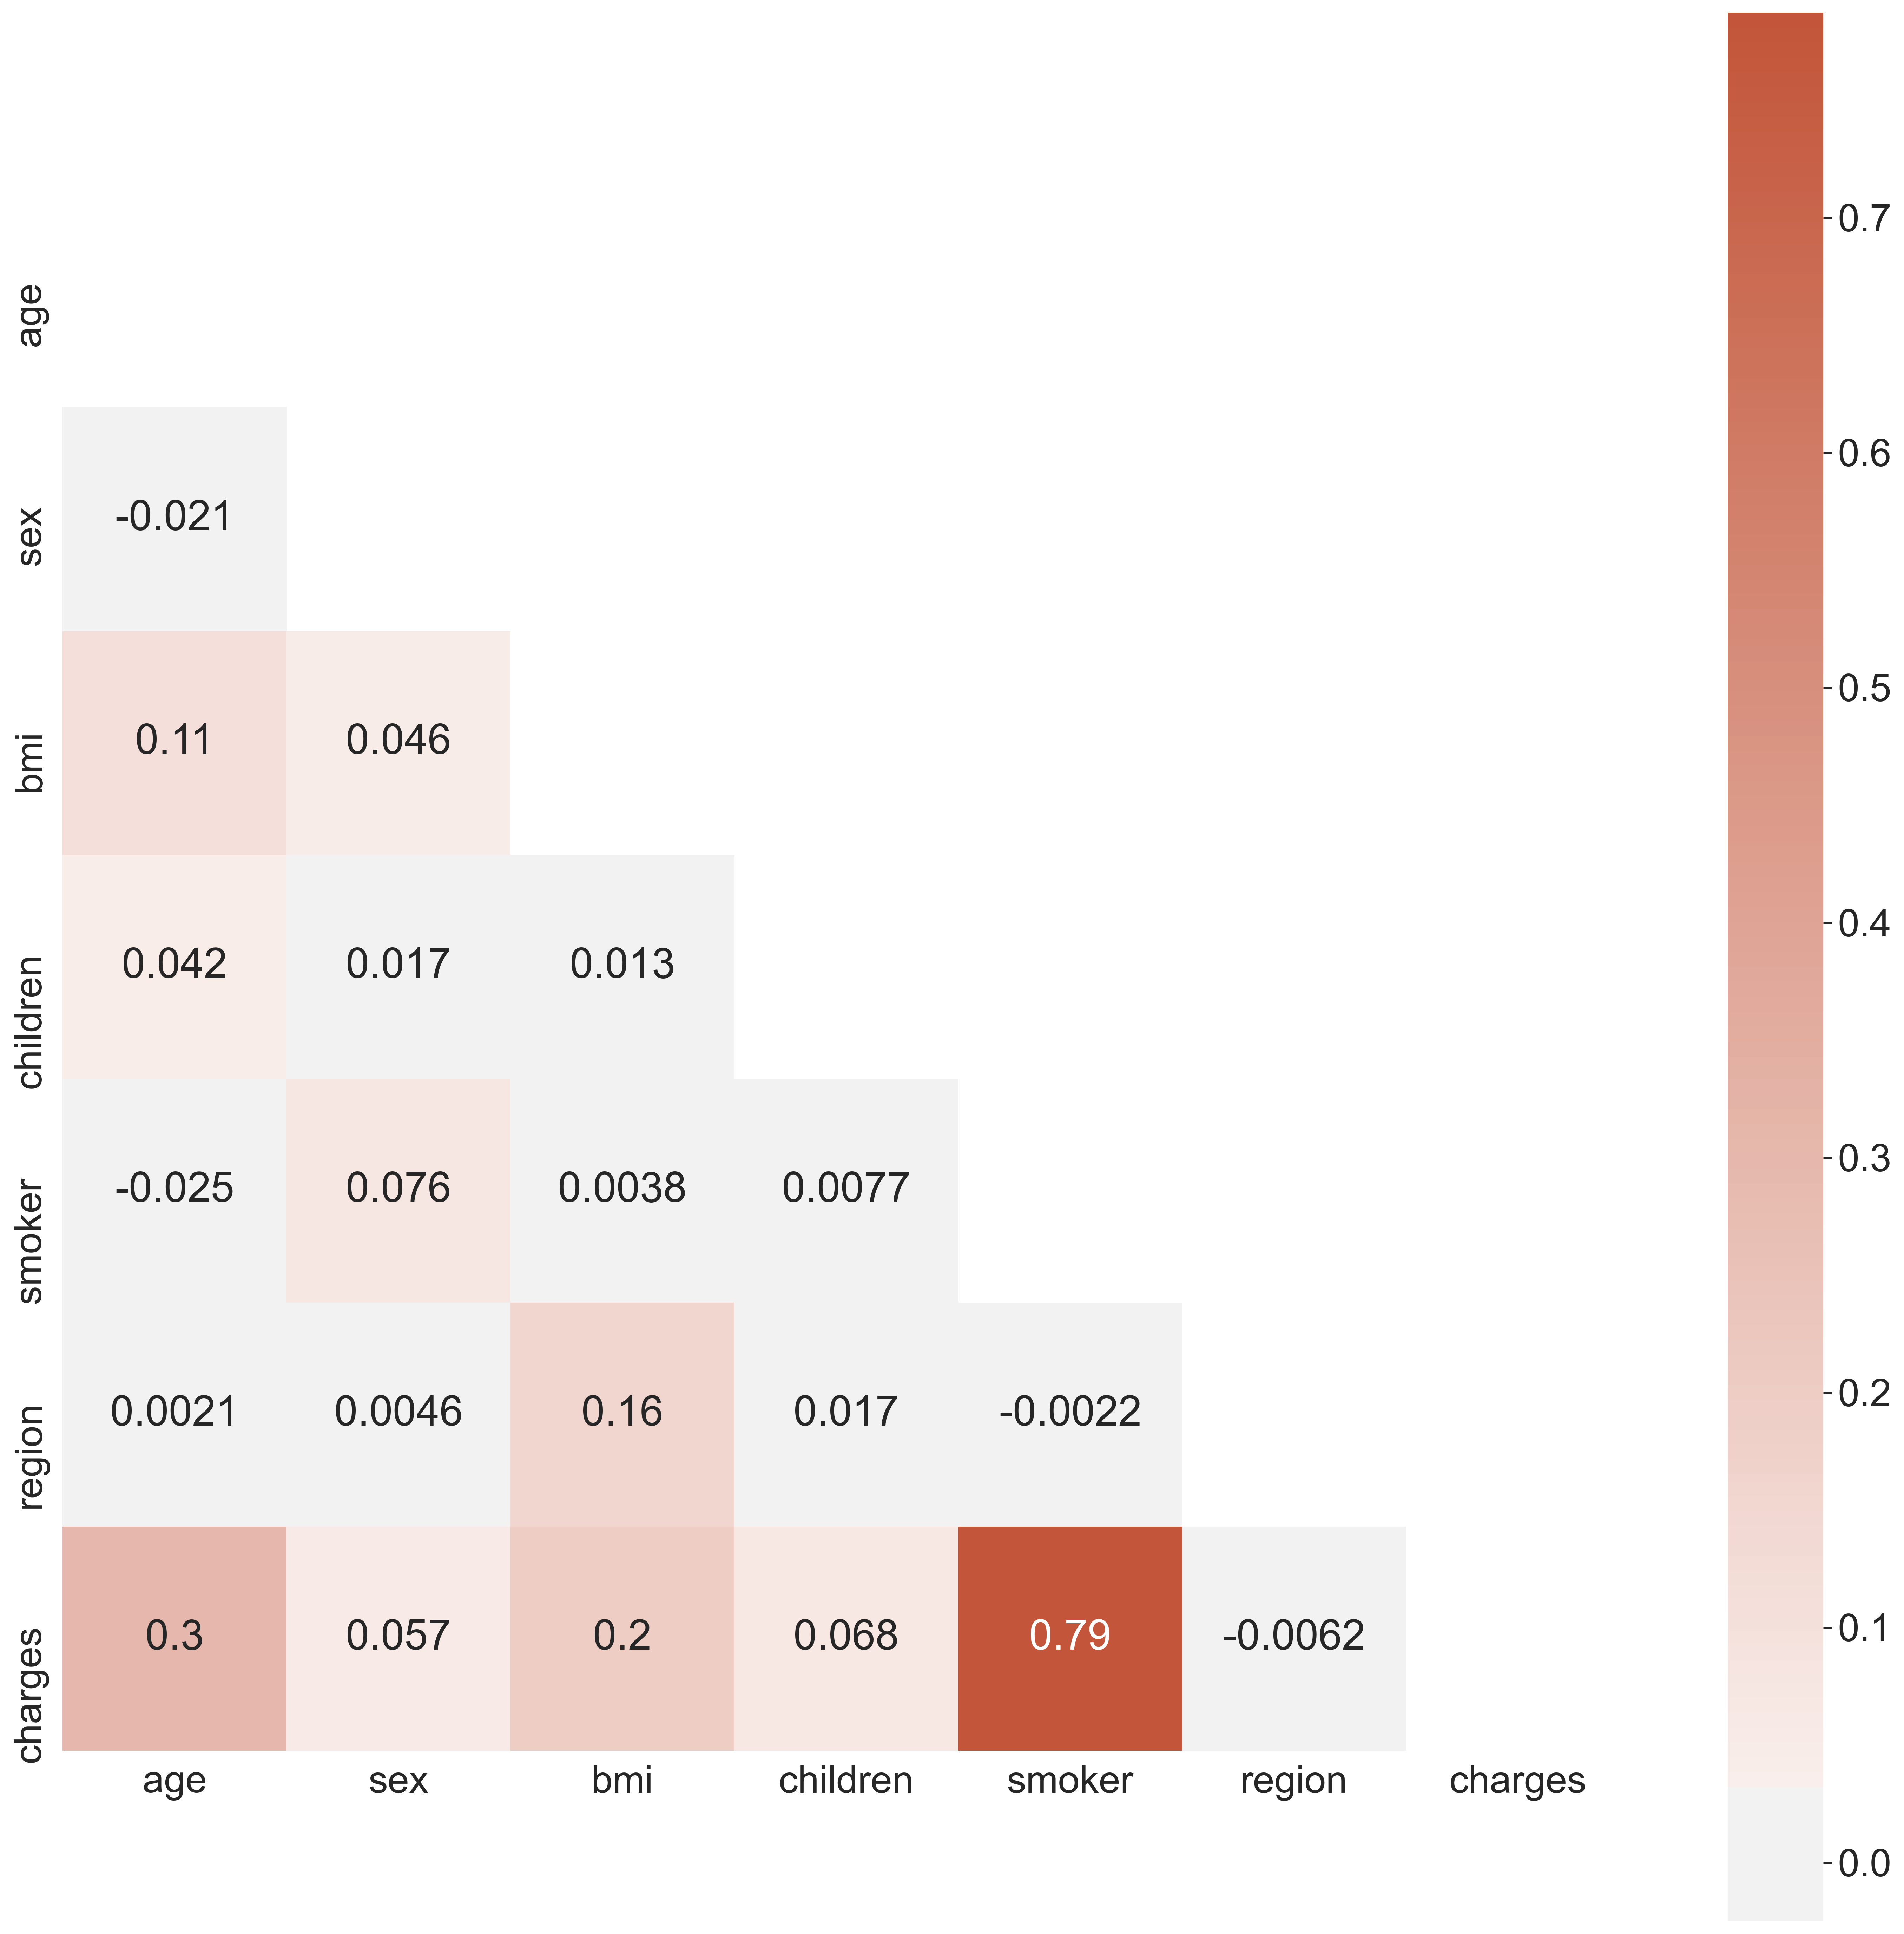

In [23]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
sns.set_context("paper", font_scale=2.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.dpi'] = 360

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, center=0,
            square=True, annot = True)

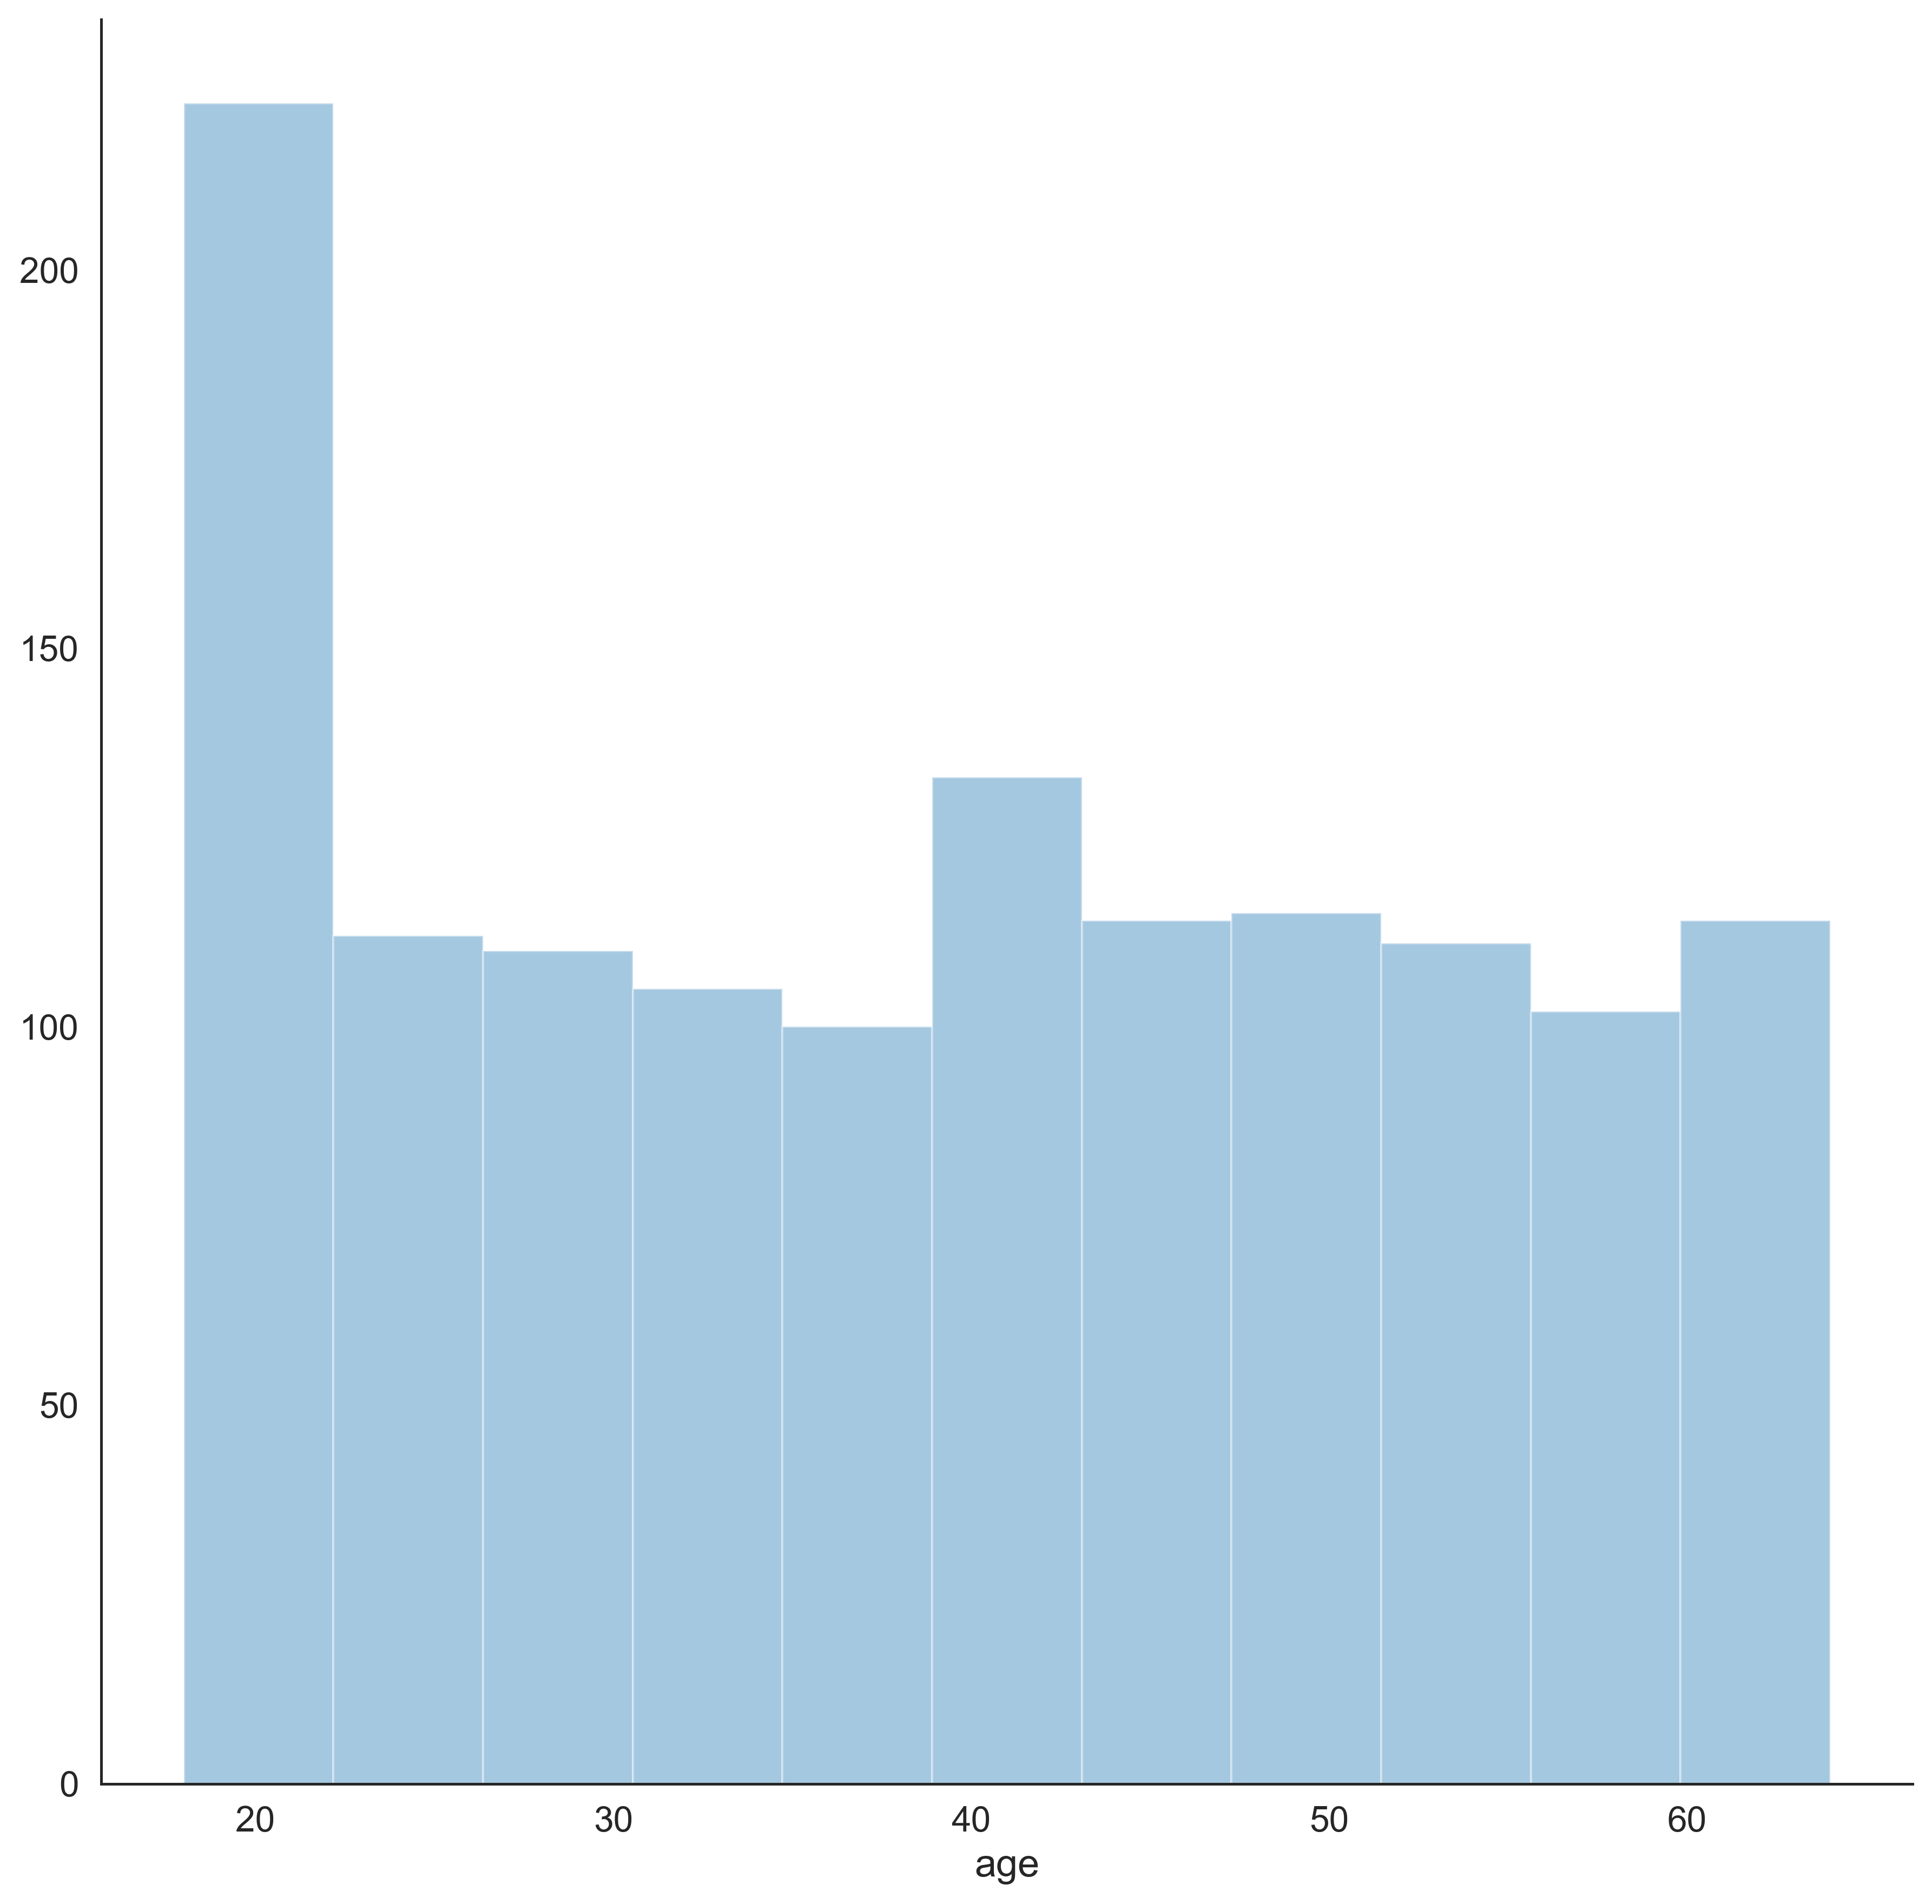

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.dpi'] = 360
ax = sns.distplot(df['age'], kde = False)
sns.despine()

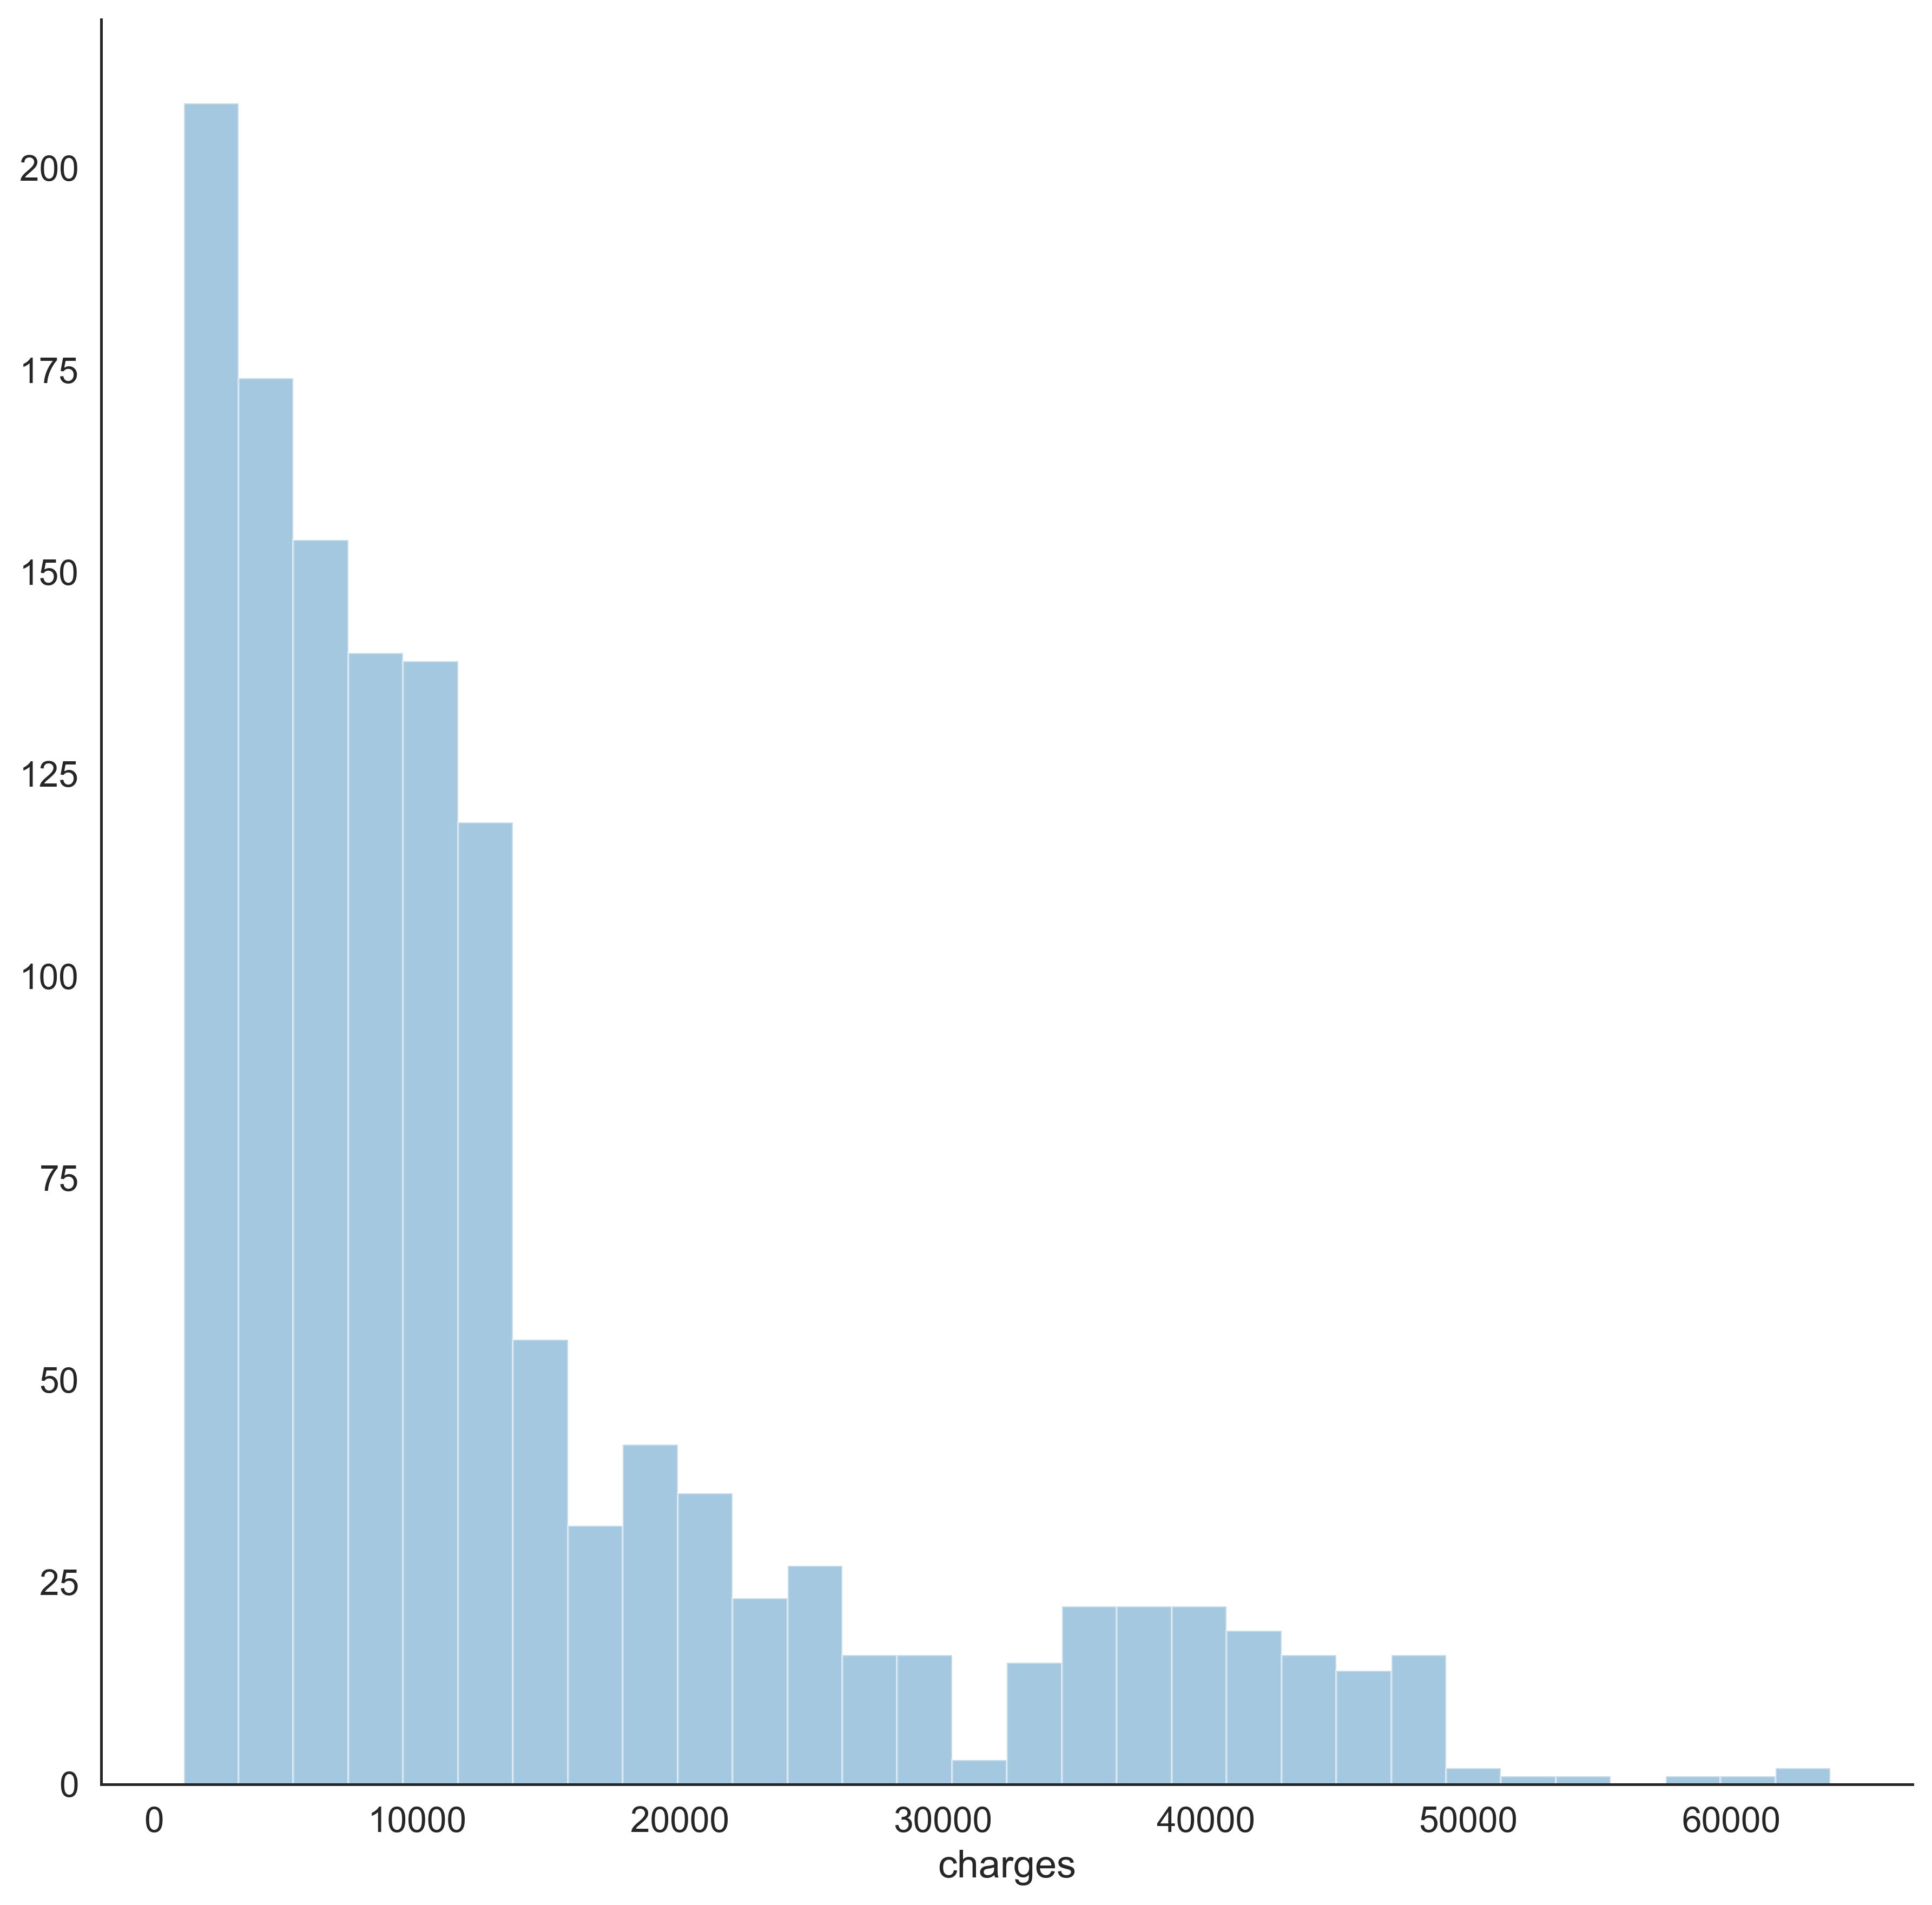

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.dpi'] = 360
ax = sns.distplot(df['charges'], kde = False)
sns.despine()

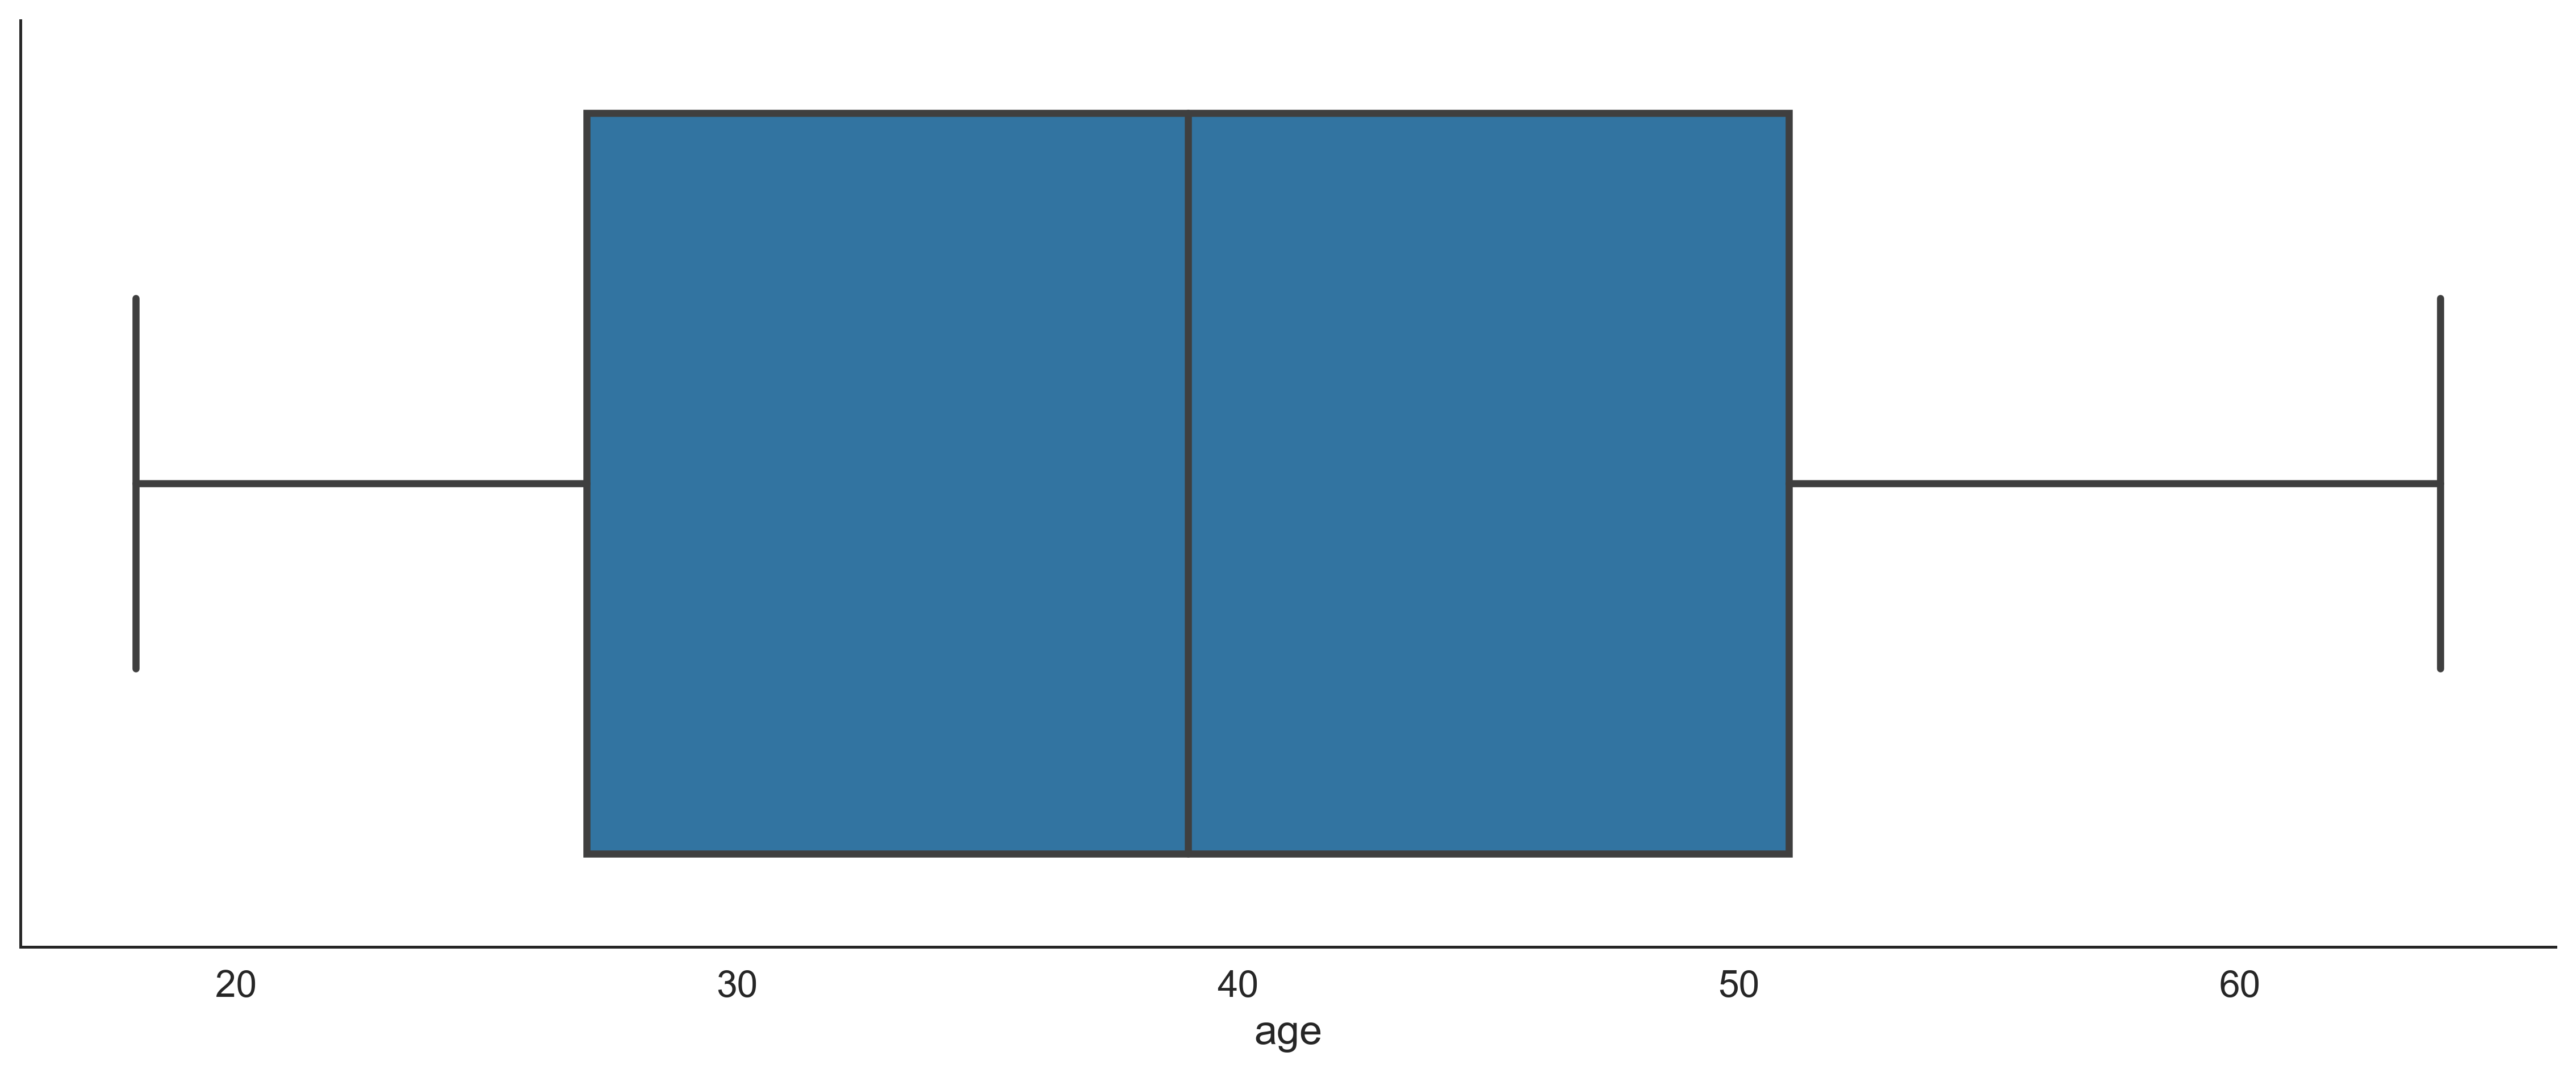

In [25]:
fig, ax = plt.subplots(figsize=(16,6))
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.dpi'] = 360
ax = sns.boxplot(x=df['age'])
sns.despine()


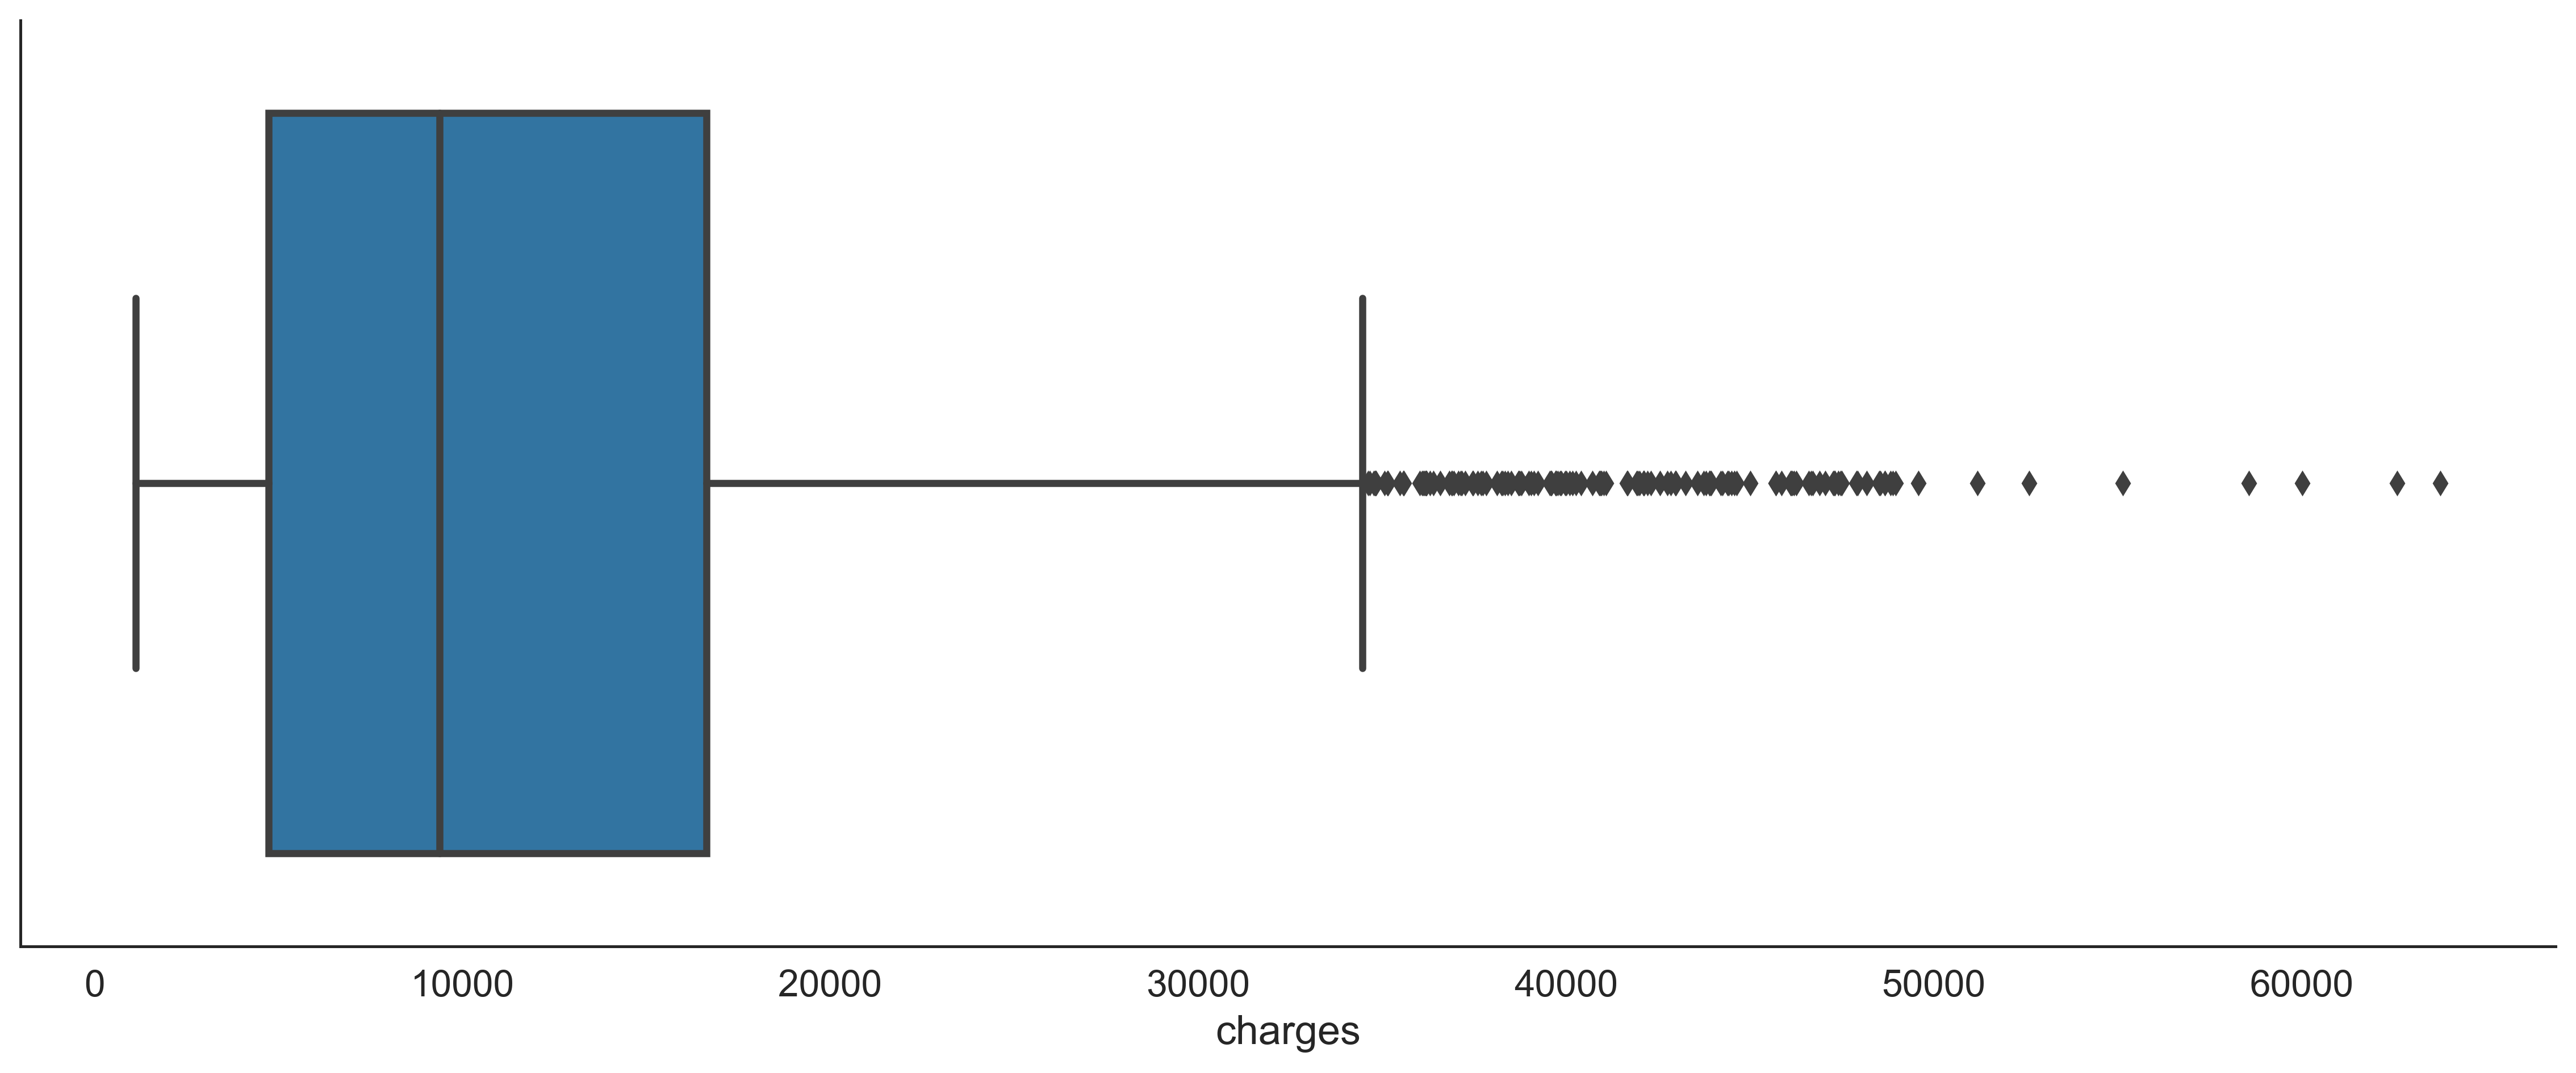

In [26]:
fig, ax = plt.subplots(figsize=(16,6))
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.dpi'] = 360
ax = sns.boxplot(x=df['charges'])
sns.despine()

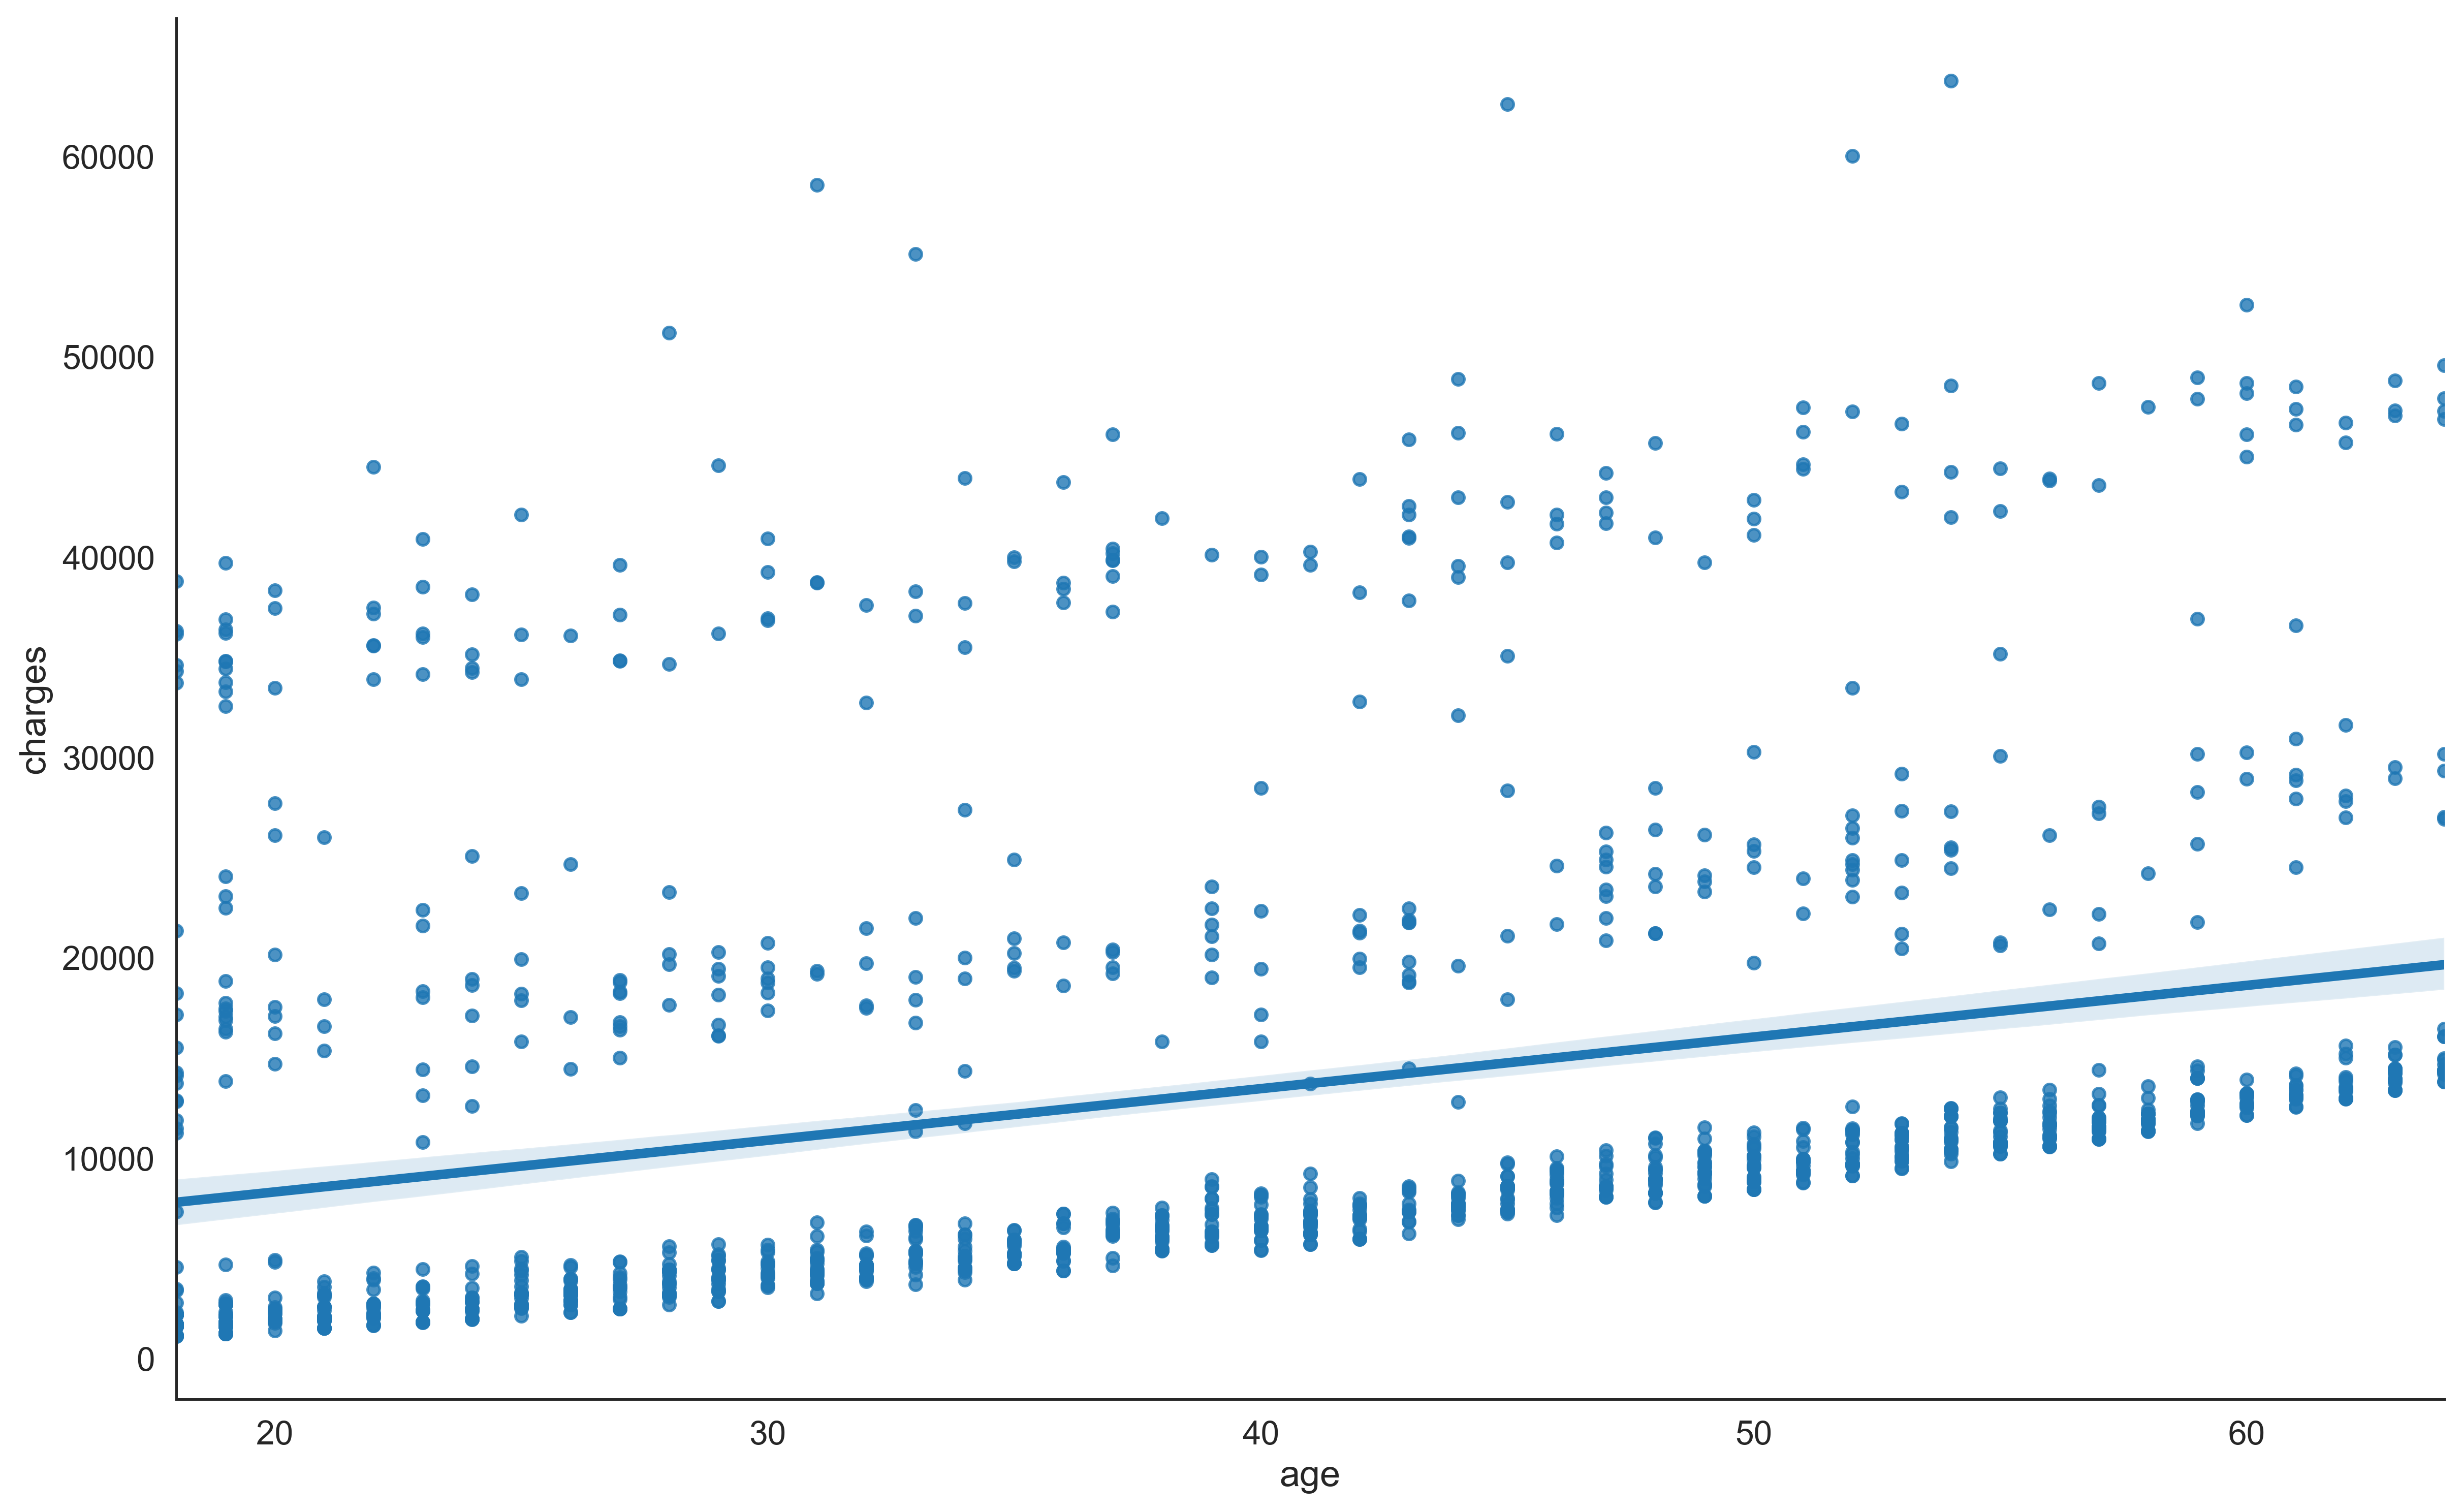

In [14]:
fig, ax = plt.subplots(figsize=(16,10))
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.dpi'] = 360
ax = sns.regplot(data=df, x = "age", y = "charges")
sns.despine()


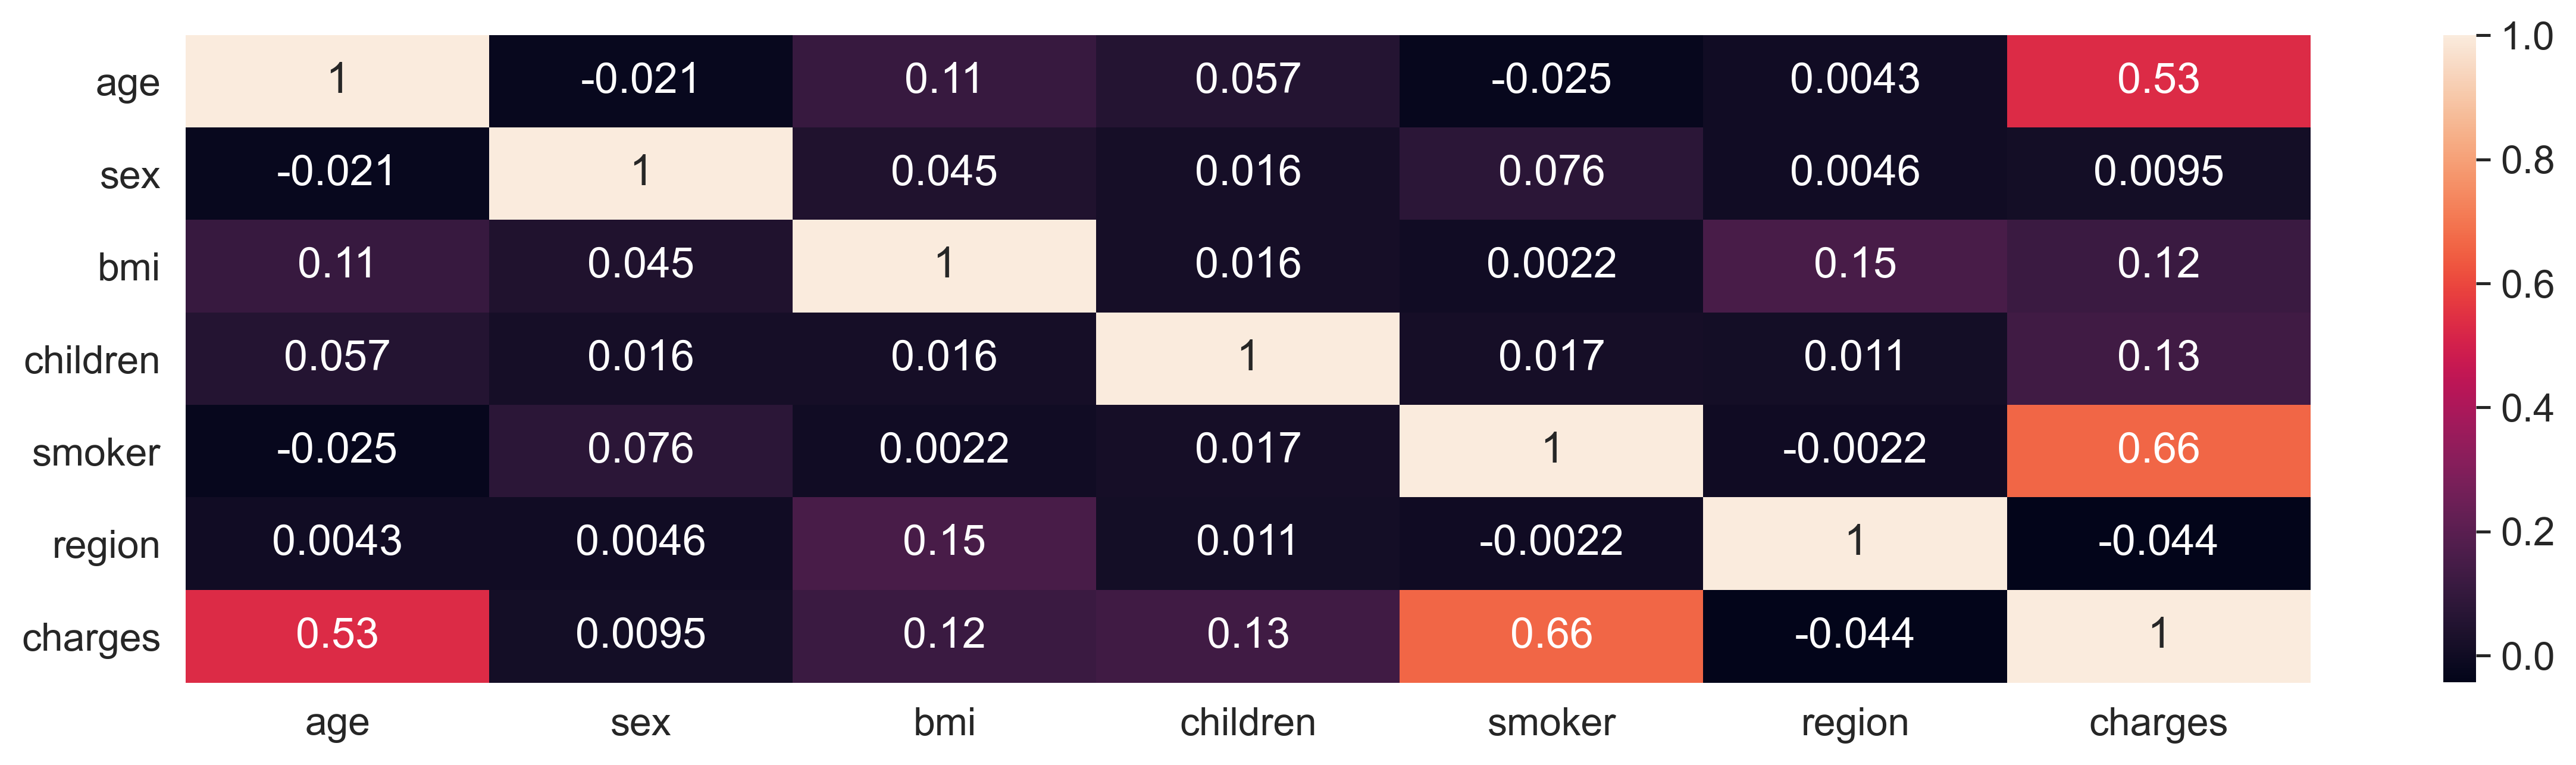

In [58]:
fig, ax = plt.subplots(figsize=(16,4))
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.dpi'] = 360
ax =sns.heatmap(df.corr(method = 'spearman'), annot = True)

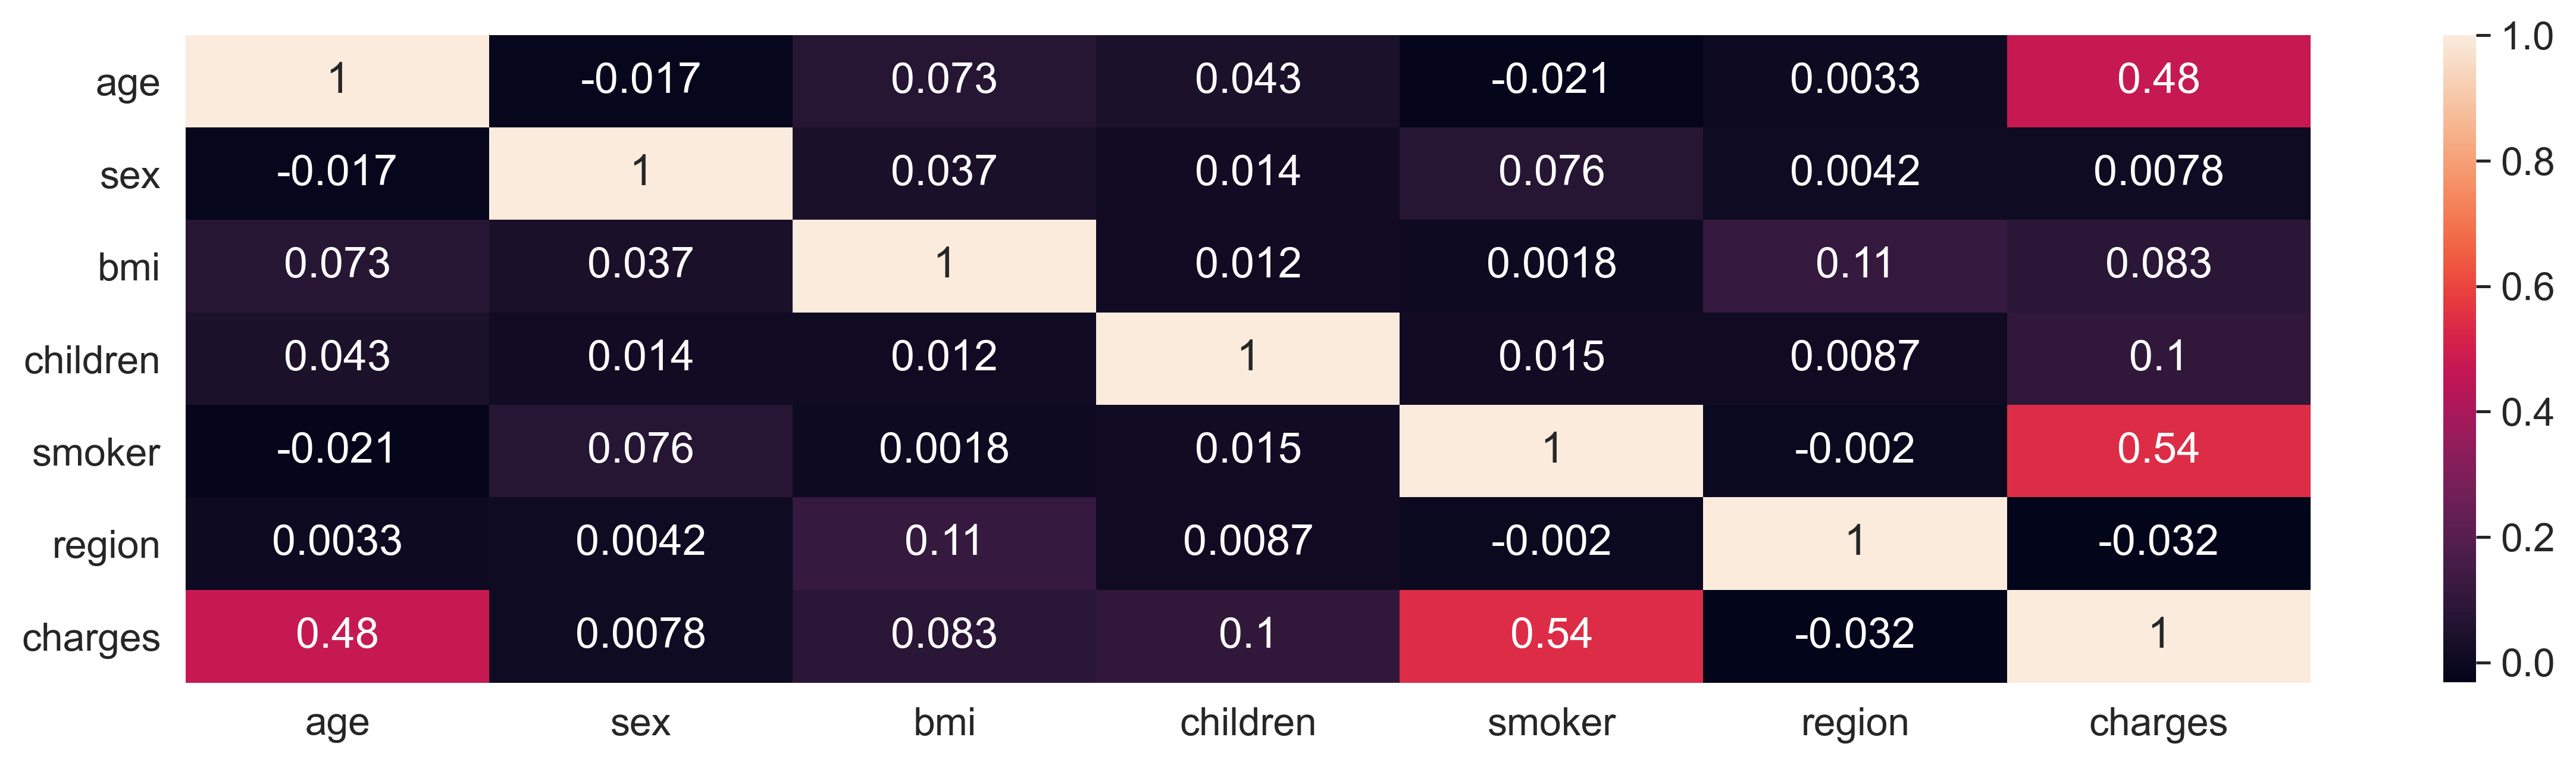

In [59]:
fig, ax = plt.subplots(figsize=(16,4))
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.dpi'] = 360
ax =sns.heatmap(df.corr(method = 'kendall'), annot = True)

In [15]:
import pandas as pd
from scipy.stats import pointbiserialr

In [16]:
pbc = pointbiserialr(df['smoker'], df['charges'])
print(pbc)

PointbiserialrResult(correlation=0.7872514304984748, pvalue=8.271435842236081e-283)


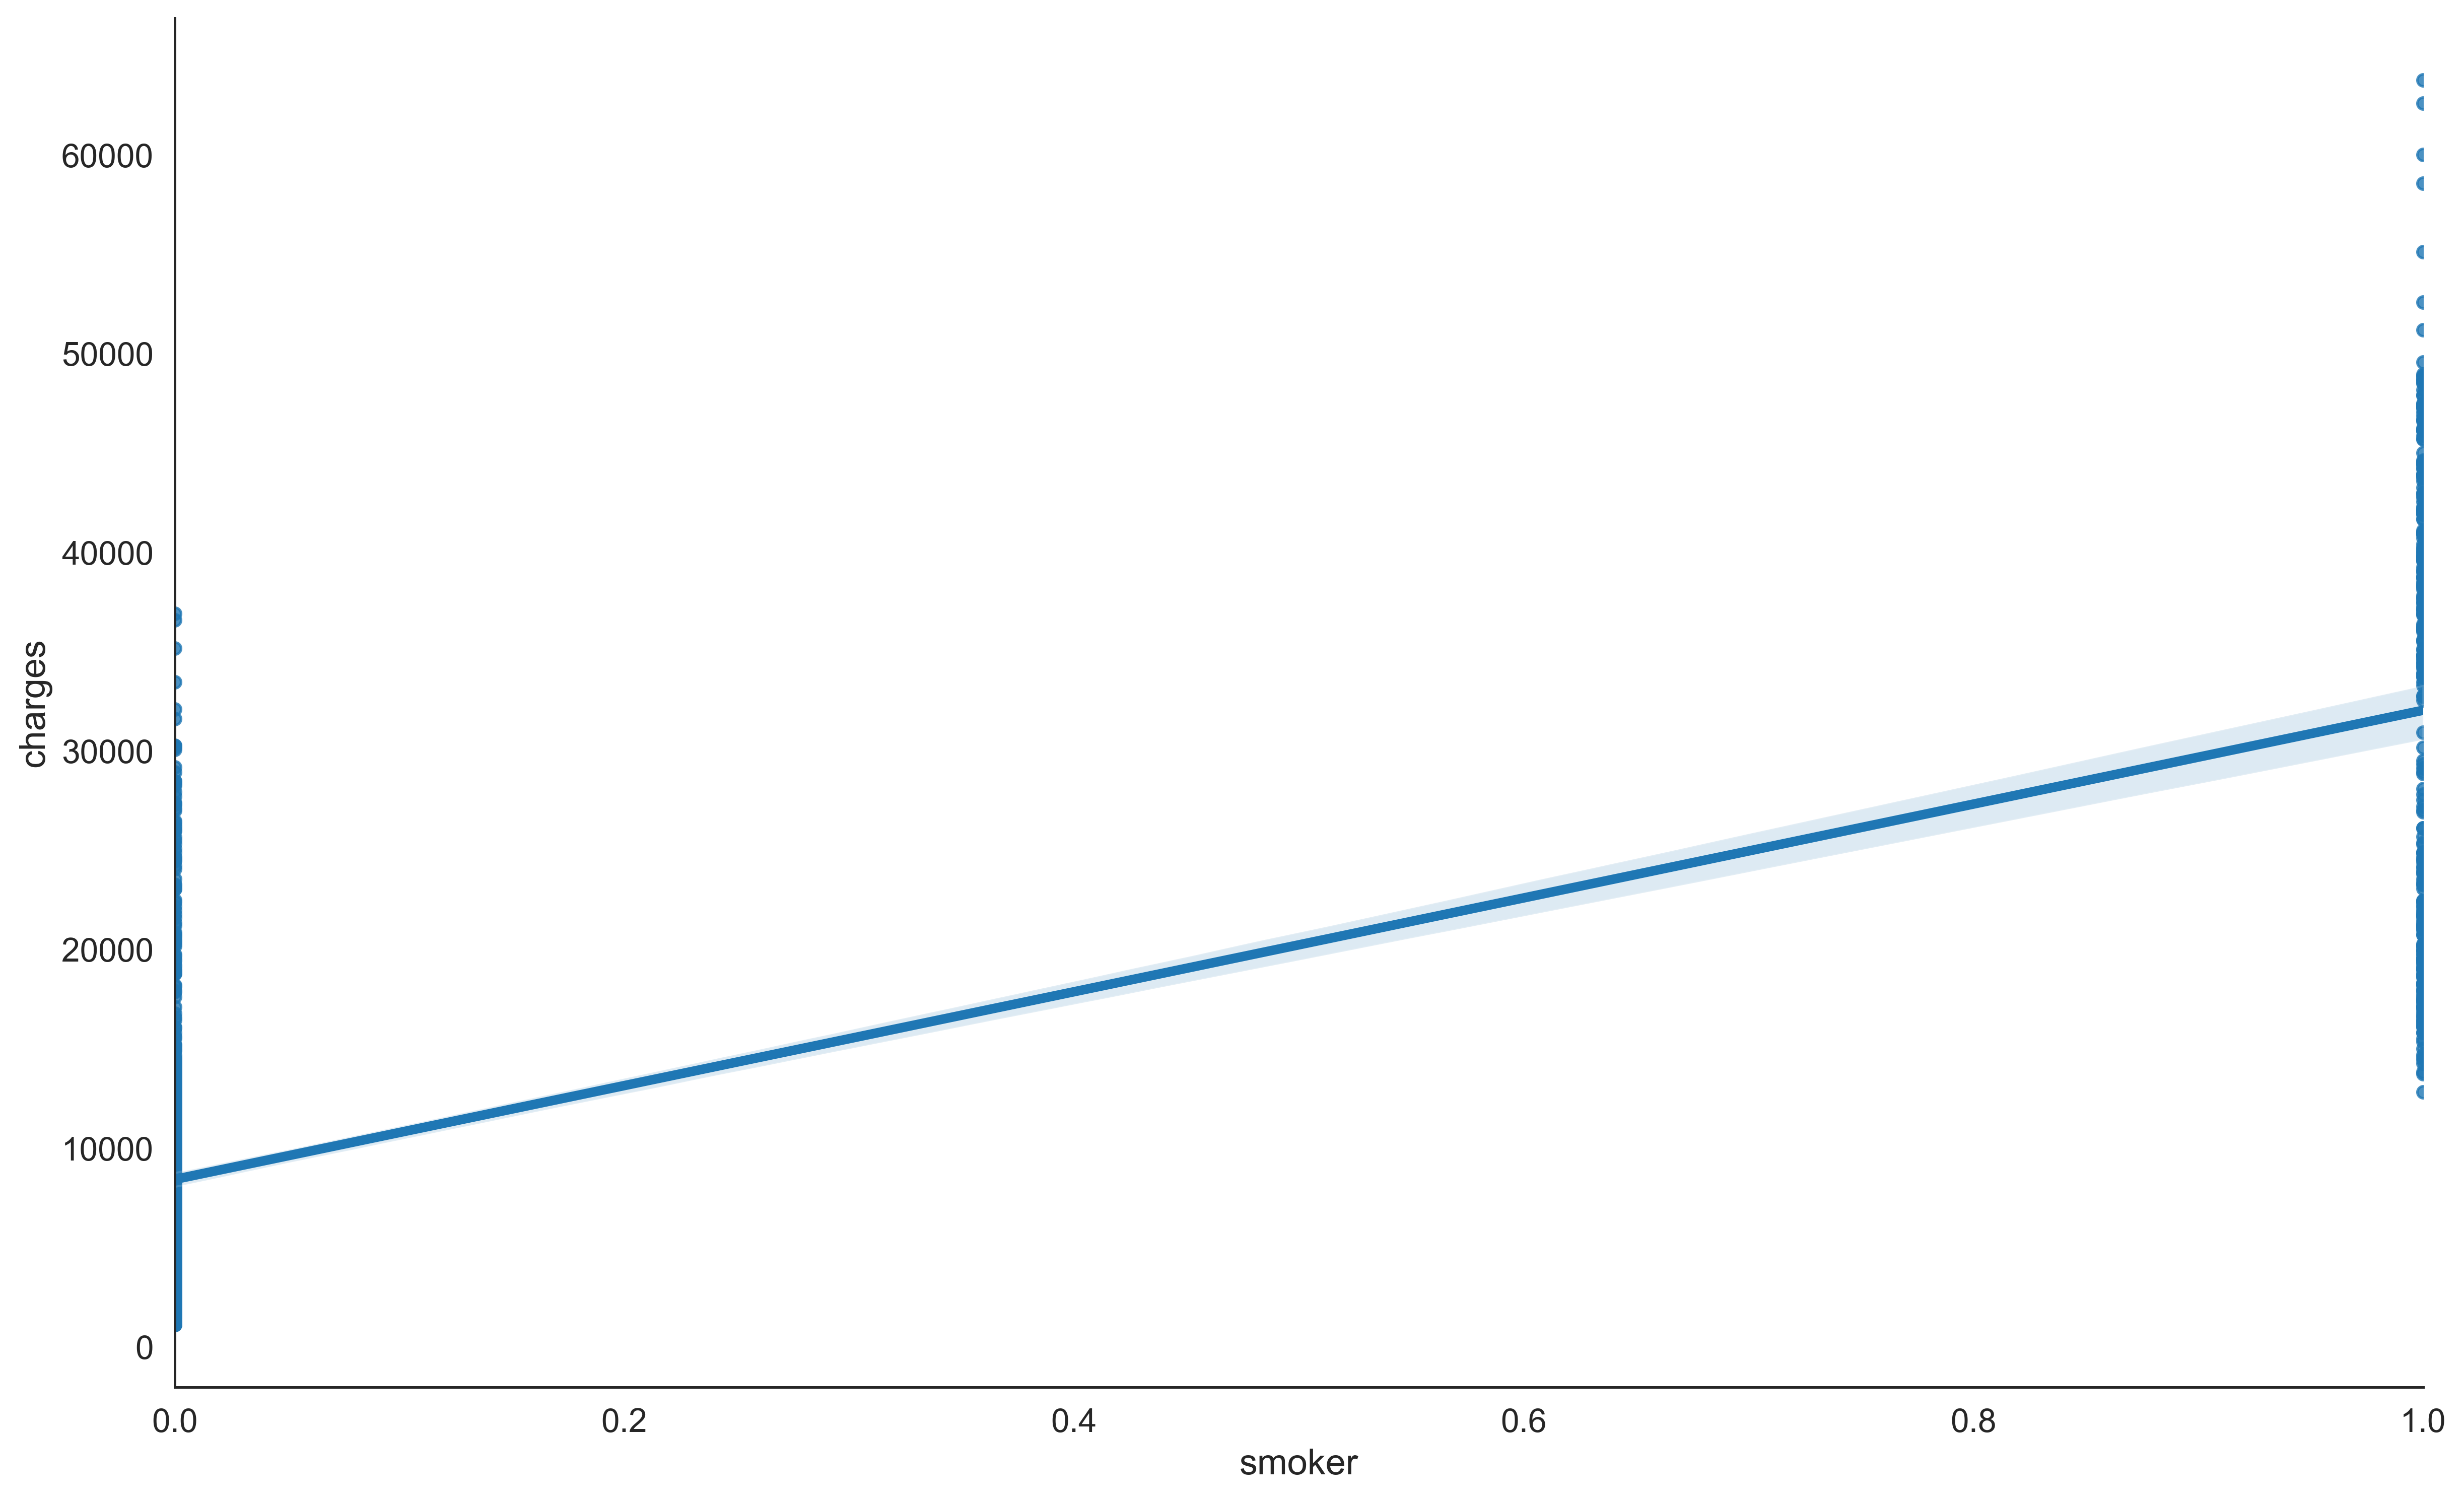

In [17]:
fig, ax = plt.subplots(figsize=(16,10))
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.dpi'] = 360
ax = sns.regplot(data=df, x = "smoker", y = "charges")
sns.despine()